In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = "/Users/monzon8/Documents/Ironhack/LAB/11.1_lab-eda-univariate/amz_uk_price_prediction_dataset.csv"  
df_amazon = pd.read_csv(path)

In [4]:
# Primeras filas del df
df_amazon.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [8]:
#Columnas del dataset:
df_amazon.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [9]:
category_conteo = df_amazon['category'].value_counts()

category_conteo

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [10]:
top_categories = category_conteo.head(5)

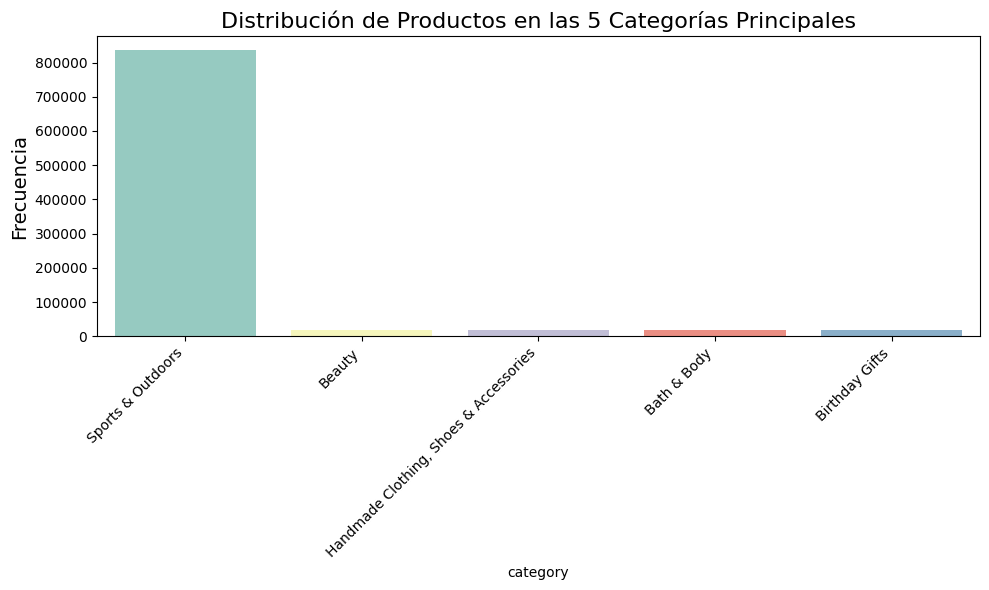

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, hue=top_categories.index, palette="Set3")
plt.title("Distribución de Productos en las 5 Categorías Principales", fontsize=16)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



Top 5 Categorías más Listadas:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


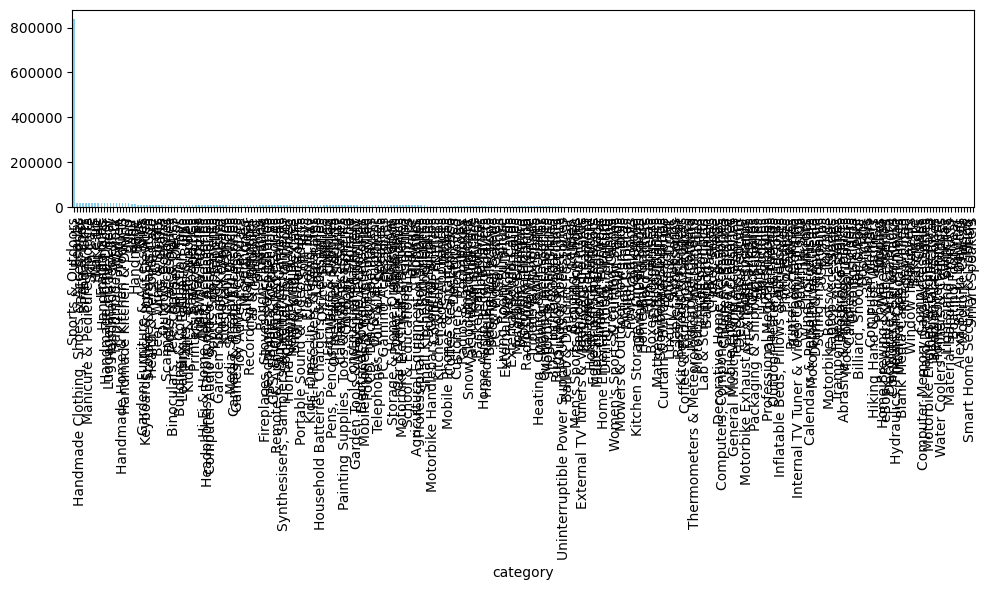

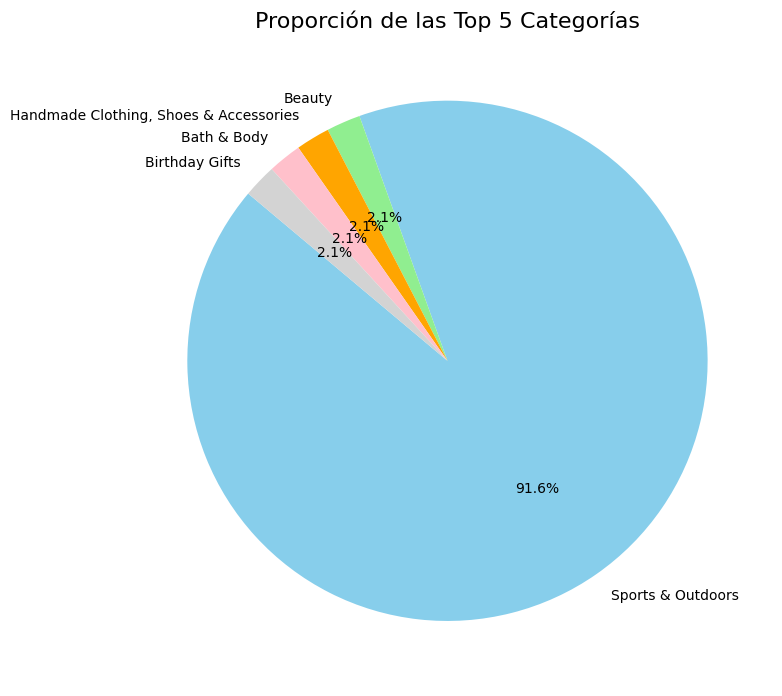

In [14]:


# Análisis de las categorías de productos
if 'category' in df_amazon.columns:  # Verifica si la columna 'category' está disponible
    # Tabla de frecuencias


    # Top 5 categorías más listadas
    top_categories = category_conteo.head(5)
    print("\nTop 5 Categorías más Listadas:")
    print(top_categories)

    # Visualización: Gráfico de barras
    plt.figure(figsize=(10, 6))
    category_conteo.plot(kind='bar', color='skyblue')
    plt.tight_layout()
    plt.show()

    # Visualización: Gráfico de pastel para las 5 principales categorías
    plt.figure(figsize=(8, 8))
    top_categories.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'orange', 'pink', 'lightgrey'])
    plt.title("Proporción de las Top 5 Categorías", fontsize=16)
    plt.ylabel("")  # Oculta la etiqueta del eje Y
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'category' no está presente en el conjunto de datos. Revisa el archivo.")


Mean Price: 89.24
Median Price: 19.09
Mode Price: 9.99
Variance: 119446.40
Standard Deviation: 345.61
Price Range: 99999.99
Interquartile Range (IQR): 36.00


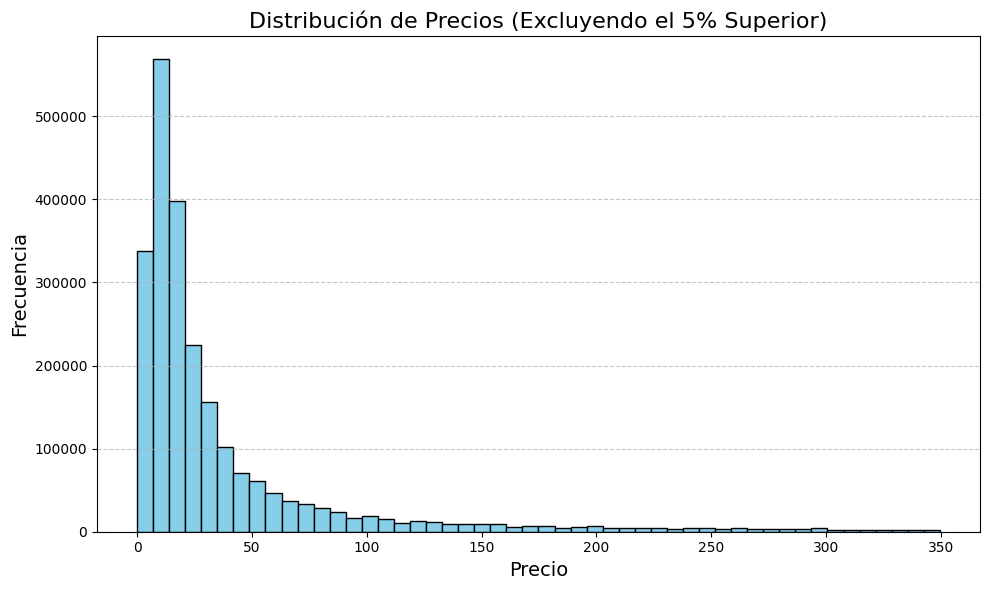

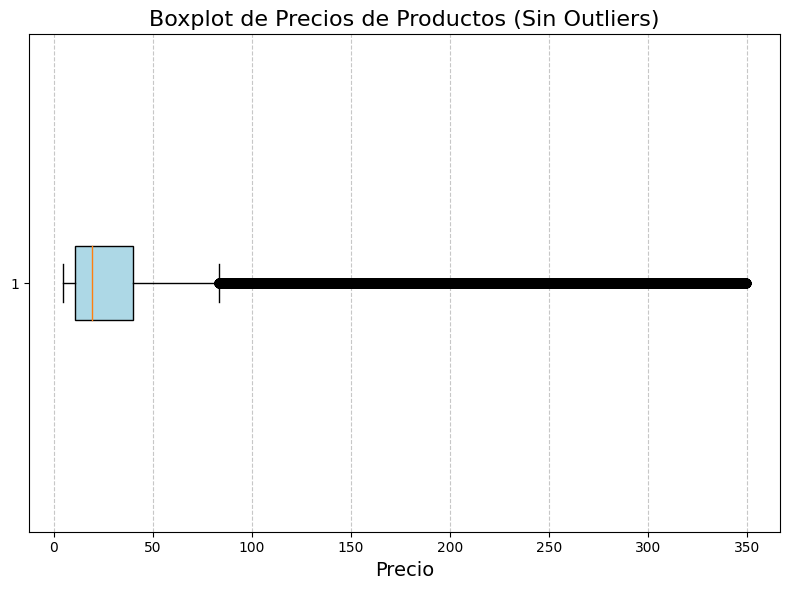

In [15]:
# Ensure the 'price' column is present and clean the data
if 'price' in df_amazon.columns:
    # Drop missing or zero prices if necessary
    prices = df_amazon['price'].dropna()
    prices = prices[prices > 0]  # Remove zero or negative prices if any

    # 1. Measures of Centrality
    mean_price = prices.mean()
    median_price = prices.median()
    mode_price = prices.mode()[0]  # Mode can return multiple values, take the first one
    print(f"Mean Price: {mean_price:.2f}")
    print(f"Median Price: {median_price:.2f}")
    print(f"Mode Price: {mode_price:.2f}")

    # 2. Measures of Dispersion
    variance = prices.var()
    std_dev = prices.std()
    price_range = prices.max() - prices.min()
    q1 = prices.quantile(0.25)
    q3 = prices.quantile(0.75)
    iqr = q3 - q1  # Interquartile range
    print(f"Variance: {variance:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Price Range: {price_range:.2f}")
    print(f"Interquartile Range (IQR): {iqr:.2f}")

    # 3. Visualizations
    # Histogram of prices
    upper_limit = prices.quantile(0.95)
    filtered_prices = prices[prices <= upper_limit]
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_prices, bins=50, color='skyblue', edgecolor='black')
    plt.title("Distribución de Precios (Excluyendo el 5% Superior)", fontsize=16)
    plt.xlabel("Precio", fontsize=14)
    plt.ylabel("Frecuencia", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


    # Box plot for price spread and outliers
   # Filtrar datos entre el percentil 5 y 95
    lower_limit = prices.quantile(0.05)
    upper_limit = prices.quantile(0.95)
    filtered_prices = prices[(prices >= lower_limit) & (prices <= upper_limit)]

    # Nuevo boxplot con rango limitado
    plt.figure(figsize=(8, 6))
    plt.boxplot(filtered_prices, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title("Boxplot de Precios de Productos (Sin Outliers)", fontsize=16)
    plt.xlabel("Precio", fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    
else:
    print("The 'price' column is not present in the dataset.")


Mean Rating: 2.15
Median Rating: 0.00
Mode Rating: 0.00
Variance: 4.82
Standard Deviation: 2.19
Interquartile Range (IQR): 4.40
Skewness: 0.08
Kurtosis: -1.93


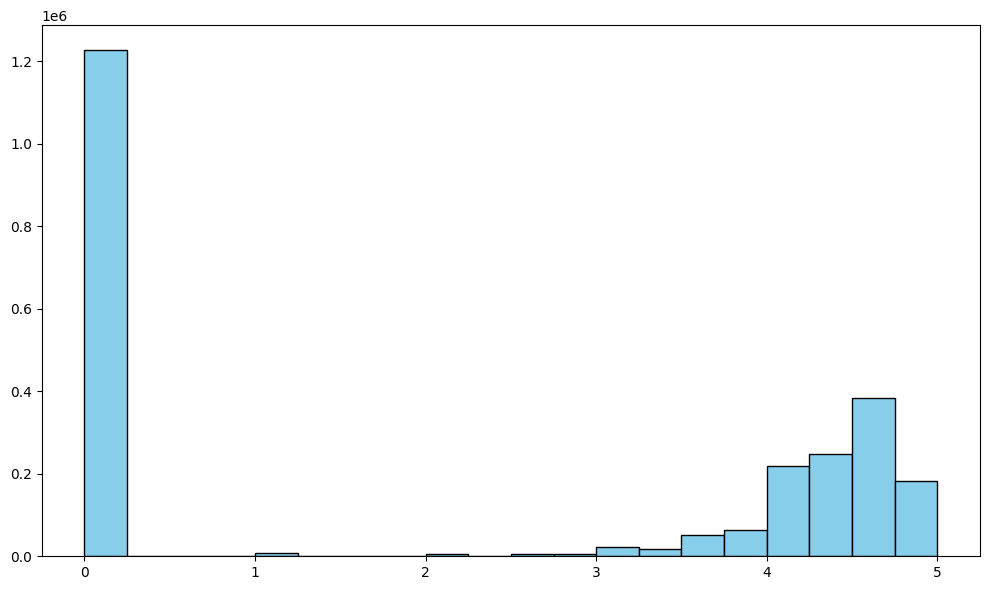

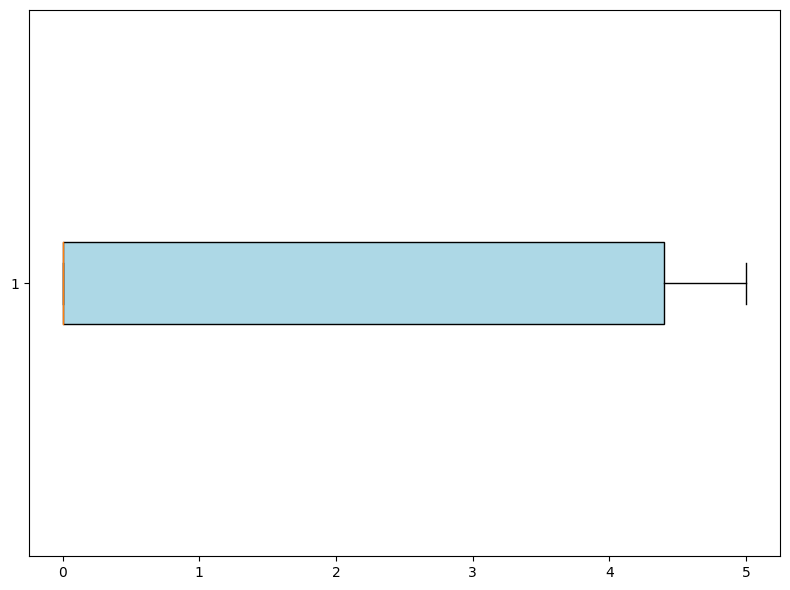

In [17]:
# Ensure the 'stars' column is present and clean the data
if 'stars' in df_amazon.columns:
    # Drop missing or invalid ratings if necessary
    ratings = df_amazon['stars'].dropna()
    
    # 1. Measures of Centrality
    mean_rating = ratings.mean()
    median_rating = ratings.median()
    mode_rating = ratings.mode()[0]  # Take the first mode if there are multiple
    print(f"Mean Rating: {mean_rating:.2f}")
    print(f"Median Rating: {median_rating:.2f}")
    print(f"Mode Rating: {mode_rating:.2f}")
    
    # 2. Measures of Dispersion
    variance = ratings.var()
    std_dev = ratings.std()
    q1 = ratings.quantile(0.25)
    q3 = ratings.quantile(0.75)
    iqr = q3 - q1
    print(f"Variance: {variance:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Interquartile Range (IQR): {iqr:.2f}")
    
    
    # 3. Shape of the Distribution
    skewness = ratings.skew()
    kurtosis_value = ratings.kurtosis()
    print(f"Skewness: {skewness:.2f}")
    print(f"Kurtosis: {kurtosis_value:.2f}")
    
    # 4. Visualizations
    # Histogram of ratings
    plt.figure(figsize=(10, 6))
    plt.hist(ratings, bins=20, color='skyblue', edgecolor='black')
    plt.tight_layout()
    plt.show()
    
    # Box plot for ratings
    plt.figure(figsize=(8, 6))
    plt.boxplot(ratings, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.tight_layout()
    plt.show()
    
else:
    print("The 'rating' column is not present in the dataset.")
